In [4]:
from langchain_community.tools import wikipedia, arxiv
from langchain_community.utilities import WikipediaAPIWrapper,ArxivAPIWrapper
from langchain_community.tools import ArxivQueryRun,WikipediaQueryRun

In [5]:
arxiv_api_wrapper = ArxivAPIWrapper(top_k_results=2,ARXIV_MAX_QUERY_LENGTH=300)
a = ArxivQueryRun(api_wrapper=arxiv_api_wrapper)
a.invoke("attention all you need")

'Published: 2024-07-22\nTitle: Attention Is All You Need But You Don\'t Need All Of It For Inference of Large Language Models\nAuthors: Georgy Tyukin, Gbetondji J-S Dovonon, Jean Kaddour, Pasquale Minervini\nSummary: The inference demand for LLMs has skyrocketed in recent months, and serving\nmodels with low latencies remains challenging due to the quadratic input length\ncomplexity of the attention layers. In this work, we investigate the effect of\ndropping MLP and attention layers at inference time on the performance of\nLlama-v2 models. We find that dropping dreeper attention layers only marginally\ndecreases performance but leads to the best speedups alongside dropping entire\nlayers. For example, removing 33\\% of attention layers in a 13B Llama2 model\nresults in a 1.8\\% drop in average performance over the OpenLLM benchmark. We\nalso observe that skipping layers except the latter layers reduces performances\nfor more layers skipped, except for skipping the attention layers.\n\

In [6]:
wiki_api_wrap = WikipediaAPIWrapper(top_k_results=2,WIKIPEDIA_MAX_QUERY_LENGTH = 300)
b = WikipediaQueryRun(api_wrapper=wiki_api_wrap)
b.invoke("what is attention mechanism")

'Page: Attention Is All You Need\nSummary: "Attention Is All You Need" is a 2017 landmark research paper in machine learning authored by eight scientists working at Google. The paper introduced a new deep learning architecture known as the transformer, based on the attention mechanism proposed in 2014 by Bahdanau et al. It is considered a foundational paper in modern artificial intelligence, and a main contributor to the AI boom, as the transformer approach has become the main architecture of a wide variety of AI, such as large language models. At the time, the focus of the research was on improving Seq2seq techniques for machine translation, but the authors go further in the paper, foreseeing the technique\'s potential for other tasks like question answering and what is now known as multimodal generative AI.\nThe paper\'s title is a reference to the song "All You Need Is Love" by the Beatles. The name "Transformer" was picked because Jakob Uszkoreit, one of the paper\'s authors, liked

In [7]:
import os
from dotenv import load_dotenv
load_dotenv()

os.environ['TAVILY_API_KEY']=os.getenv('TAVILY_API_KEY')

In [8]:
from langchain_community.tools.tavily_search import TavilySearchResults
tavily = TavilySearchResults()
for i in tavily.stream("what is current weather of rourkela"):
    print(i)

/var/folders/5r/svqhb71956990v7rdb94sdmh0000gn/T/ipykernel_76127/939781805.py:2: LangChainDeprecationWarning: The class `TavilySearchResults` was deprecated in LangChain 0.3.25 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-tavily package and should be used instead. To use it run `pip install -U :class:`~langchain-tavily` and import as `from :class:`~langchain_tavily import TavilySearch``.
  tavily = TavilySearchResults()


[{'title': 'Raurkela, Odisha, India Weather Forecast | AccuWeather', 'url': 'https://www.accuweather.com/en/in/raurkela/189790/weather-forecast/189790', 'content': 'Today. 8/25. 85° · Periods of rain. Night: Cloudy with a touch of rain. 97% ; Tue. 8/26. 91° · A little morning rain. A little rain in the evening. 63% ; Wed. 8/27.', 'score': 0.98569}, {'title': 'Rourkela, Odisha, India 14 day weather forecast - Time and Date', 'url': 'https://www.timeanddate.com/weather/india/rourkela/ext', 'content': 'Rourkela Extended Forecast with high and low temperatures ... Passing showers. Overcast. Feels Like: 93 °F. Humidity: 81%. Precipitation: Rain: 0.15 Snow:', 'score': 0.98421}, {'title': 'Weather Forecast and Conditions for Rourkela, Odisha, India', 'url': 'https://weather.com/weather/today/l/d90ce98b2498d463a82bd6fe2363a62fdf5a1b0eddb423273ce89de7e833c7d8', 'content': 'Cloudy this morning with thunderstorms developing this afternoon. Hazy. High 84F. Winds light and variable. Chance of rain 

## combine all the tools

In [9]:
tools = [a,b,tavily]

### initialize LLM

In [10]:
os.environ["GROQ_API_KEY"]=os.getenv("GROQ_API_KEY")

In [11]:
from langchain_groq import ChatGroq
llm = ChatGroq(model="llama-3.3-70b-versatile")
llm_with_tools = llm.bind_tools(tools)

In [12]:
from pprint import pprint
from langchain_core.messages import AIMessage,HumanMessage
llm_with_tools.invoke([HumanMessage(content=f"what is cuurent news trending")])

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': '6nr3t3qyj', 'function': {'arguments': '{"query":"current news trending"}', 'name': 'tavily_search_results_json'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 20, 'prompt_tokens': 553, 'total_tokens': 573, 'completion_time': 0.026477279, 'prompt_time': 0.050082003, 'queue_time': 0.044434907, 'total_time': 0.076559282}, 'model_name': 'llama-3.3-70b-versatile', 'system_fingerprint': 'fp_6507bcfb6f', 'service_tier': 'on_demand', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--831b6b43-9de0-4723-8cf4-ed9970065187-0', tool_calls=[{'name': 'tavily_search_results_json', 'args': {'query': 'current news trending'}, 'id': '6nr3t3qyj', 'type': 'tool_call'}], usage_metadata={'input_tokens': 553, 'output_tokens': 20, 'total_tokens': 573})

In [13]:
def multiply(a:int,b:int)->int:
    """multiply a and b.
    Args:
    a:first int
    b:second int
    
    """
    return a*b
def divide(a:int,b:int)->int:
    """divide a and b
    Args:
    a:first int
    b:second int
    """
    return a/b
def add(a:int,b:int)->int:
    """add a and b
    Args:
    a:first int
    b:second int
    """
    return a+b


In [14]:
tools=[a,b,tavily,multiply,divide,add]
llm_with_tools = llm.bind_tools(tools)

### made langgraph with all tools

In [15]:
from typing_extensions import TypedDict
from langgraph.graph.message import add_messages
from typing import Annotated
from langchain_core.messages import AnyMessage

class state(TypedDict):
    messages:Annotated[list[AnyMessage],add_messages]

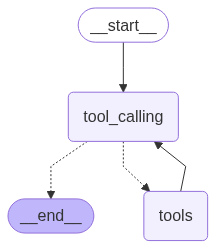

In [18]:
from IPython.display import Image,display
from langgraph.graph import StateGraph,START,END
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition

def tool_calling_llm(state:state):
    return {"messages":[llm_with_tools.invoke(state['messages'])]}

builder = StateGraph(state)
builder.add_node("tool_calling",tool_calling_llm)
builder.add_node("tools",ToolNode(tools))

builder.add_edge(START,"tool_calling")
builder.add_conditional_edges("tool_calling",tools_condition)
builder.add_edge("tools","tool_calling")
graph = builder.compile()
display(Image(graph.get_graph().draw_mermaid_png()))

In [17]:
messages = [HumanMessage(content="what is multiply by 2 and 5")]
messages = graph.invoke({"messages":messages})
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

what is multiply by 2 and 5
================================== Ai Message ==================================
Tool Calls:
  multiply (wrmx5rpbb)
 Call ID: wrmx5rpbb
  Args:
    a: 2
    b: 5
================================= Tool Message =================================
Name: multiply

10
